In [1]:
from src.integration import *
from src.model import *
import matplotlib.pyplot as plt
from src.neural_network import *

plt.rcParams['figure.dpi'] = 120 

TensorFlow version: 2.9.1


In [ ]:
t_0 = 0
t_end = 20

beta=11.5
A=20
d=0.1
nu=1
b=0.022
mu0 = 10      
mu1 = 10.45
y0 = [195.3, 0.052, 4.4]

t = np.linspace(t_0, t_end, 300)

model = SIR(t_0, t_end, beta, A, d, nu, b, mu0, mu1)

ann = NeuralNetwork()
ann.import_data('data/NormalizedSimpleSIRData.csv')
ann.fit()
ann.model.evaluate(ann.x_test, ann.y_test, verbose=2)

S_norm = (y0[0]-194.612131) / (196.199362-194.612131)
I_norm = (y0[1]-0.030732) / (0.052602-0.030732)
R_norm = (y0[2]-3.433552) / (4.862474-3.433552)

mu = ann.model.predict(np.array([[S_norm, I_norm, R_norm]]))[0][0]

s, i, r = classic_runge_kutta_ann(model.integration_model_ann, y0, t, ann)

# Calculation with a constant mu predicted from the network derived from y0:

# mu0 = ann.model.predict(np.array([[S_norm, I_norm, R_norm]]))[0][0]
# s, i, r = classic_runge_kutta_mu(model.integration_model_mu, y0, t, mu0)

Model: "grayboxann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 8)                 32        
                                                                 
 hiddenlayer2 (Dense)        (None, 8)                 72        
                                                                 
 outputlayer (Dense)         (None, 1)                 9         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


2022-07-27 23:01:46.218623: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
200/200 [==============================] - 1s 1ms/step - loss: 84.9164 - mse: 84.9164 - mae: 9.1872
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 20.1100 - mse: 20.1100 - mae: 3.8622
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 1.8911 - mse: 1.8911 - mae: 1.2186
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.7310 - mse: 0.7310 - mae: 0.7596
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3179 - mse: 0.3179 - mae: 0.5008
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1589 - mse: 0.1589 - mae: 0.3533
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.0830 - mse: 0.0830 - mae: 0.2541
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0411 - mse: 0.0411 - mae: 0.1772
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 0.0190 - mse: 0.0190 - mae: 0.1170
Epoch 

<Figure size 720x480 with 0 Axes>

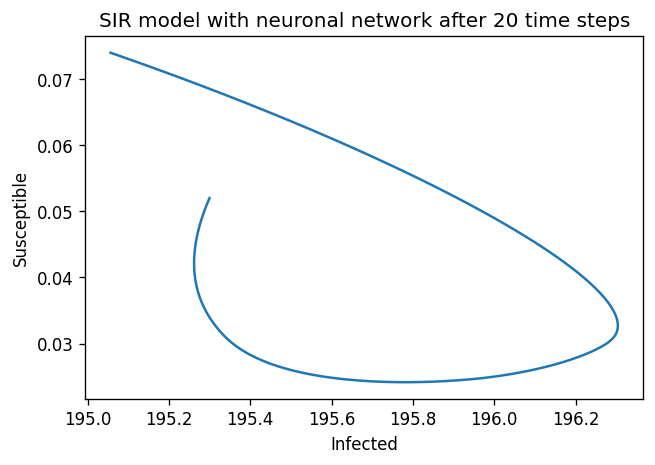

In [5]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.set_title("SIR model with neuronal network after 200 time steps")

ax.plot(s, i)

ax.set_xlabel("Infected")
ax.set_ylabel("Susceptible")

fig.savefig('images/task3_ann.png')